In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# this was the original script to run
# from citipy import citipy

#from citipy import City
# generates NameError: name 'citipy' is not defined in the next cell
# or AttributeError: type object 'City' has no attribute 'nearest_city' if I change citipy.nearest_city to City.nearest_city

# I changed it to this based on the name in the citipy.py file
# from citipy import City

# below worked just by itself
import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    #city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# print(cities[0])

In [7]:
# 6.2.6 Get the City Weather Data

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
 # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | longyearbyen
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | port blair
Processing Record 4 of Set 13 | puerto ayora
Processing Record 5 of Set 13 | bathsheba
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | mangan
Processing Record 8 of Set 13 | nyanza
Processing Record 9 of Set 13 | faya
Processing Record 10 of Set 13 | ilulissat
Processing Record 11 of Set 13 | gaurnadi
Processing Record 12 of Set 13 | karauzyak
City not found. Skipping...
Processing Record 13 of Set 13 | adrar
Processing Record 14 of Set 13 | kapaa
Processing Record 15 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 13 | port lincoln
Processing Record 17 of Set 13 | hilo
Processing Record 18 of Set 13 | vila velha
Processing Record 19 of Set 13 | saldanha
Processing Record 20 of Set 13 | victoria
Processing Record 21 of Set 13 | cherskiy
Processing Re

Processing Record 33 of Set 16 | touros
Processing Record 34 of Set 16 | ahipara
Processing Record 35 of Set 16 | coquimbo
Processing Record 36 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 16 | humaita
Processing Record 38 of Set 16 | souillac
Processing Record 39 of Set 16 | upernavik
Processing Record 40 of Set 16 | uppsala
Processing Record 41 of Set 16 | lagodekhi
Processing Record 42 of Set 16 | gobabis
Processing Record 43 of Set 16 | ouadda
Processing Record 44 of Set 16 | bredasdorp
Processing Record 45 of Set 16 | luorong
Processing Record 46 of Set 16 | mahebourg
Processing Record 47 of Set 16 | olivenza
Processing Record 48 of Set 16 | dutse
Processing Record 49 of Set 16 | vwawa
Processing Record 50 of Set 16 | okhotsk
Processing Record 1 of Set 17 | kosonsoy
Processing Record 2 of Set 17 | saint-joseph
Processing Record 3 of Set 17 | jardim
Processing Record 4 of Set 17 | sena madureira
Processing Record 5 of Set 17 | korla
Processing Record

Processing Record 16 of Set 20 | inyonga
Processing Record 17 of Set 20 | jyvaskyla
Processing Record 18 of Set 20 | haibowan
City not found. Skipping...
Processing Record 19 of Set 20 | alugan
Processing Record 20 of Set 20 | burica
City not found. Skipping...
Processing Record 21 of Set 20 | asau
Processing Record 22 of Set 20 | karaul
City not found. Skipping...
Processing Record 23 of Set 20 | merauke
Processing Record 24 of Set 20 | ijaki
City not found. Skipping...
Processing Record 25 of Set 20 | jiazi
Processing Record 26 of Set 20 | ponta do sol
Processing Record 27 of Set 20 | colares
Processing Record 28 of Set 20 | mossendjo
Processing Record 29 of Set 20 | tual
Processing Record 30 of Set 20 | lompoc
Processing Record 31 of Set 20 | ornes
Processing Record 32 of Set 20 | chapais
Processing Record 33 of Set 20 | puerto cortes
City not found. Skipping...
Processing Record 34 of Set 20 | awjilah
Processing Record 35 of Set 20 | vao
Processing Record 36 of Set 20 | guajara-mir

Processing Record 49 of Set 23 | mangrol
Processing Record 50 of Set 23 | mgandu
Processing Record 1 of Set 24 | san
Processing Record 2 of Set 24 | weymouth
Processing Record 3 of Set 24 | skerries
Processing Record 4 of Set 24 | tura
Processing Record 5 of Set 24 | santa cruz
Processing Record 6 of Set 24 | trat
Processing Record 7 of Set 24 | leh
Processing Record 8 of Set 24 | conceicao do araguaia
Processing Record 9 of Set 24 | puerto ayacucho
Processing Record 10 of Set 24 | wulanhaote
City not found. Skipping...
Processing Record 11 of Set 24 | severnyy
Processing Record 12 of Set 24 | lambarene
Processing Record 13 of Set 24 | viedma
Processing Record 14 of Set 24 | kaeo
Processing Record 15 of Set 24 | lagos
Processing Record 16 of Set 24 | gat
Processing Record 17 of Set 24 | pyu
Processing Record 18 of Set 24 | eyl
Processing Record 19 of Set 24 | pochutla
Processing Record 20 of Set 24 | esperance
Processing Record 21 of Set 24 | padang
Processing Record 22 of Set 24 | por

In [12]:
# 6.2.7 Create a DataFrame of City Weather Data

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,15.64,92,100,3.44,SJ,2022-02-14 00:28:55
1,Ushuaia,-54.8000,-68.3000,38.86,81,40,26.46,AR,2022-02-14 00:26:45
2,Port Blair,11.6667,92.7500,69.84,88,20,0.00,IN,2022-02-14 00:28:56
3,Puerto Ayora,-0.7393,-90.3518,75.54,92,76,1.01,EC,2022-02-14 00:26:27
4,Bathsheba,13.2167,-59.5167,77.61,73,40,16.11,BB,2022-02-14 00:28:56
5,Rikitea,-23.1203,-134.9692,78.73,71,56,13.89,PF,2022-02-14 00:26:48
6,Mangan,27.5167,88.5333,48.74,46,1,7.23,IN,2022-02-14 00:28:56
7,Nyanza,-2.3519,29.7509,57.18,87,100,4.07,RW,2022-02-14 00:28:57
8,Faya,18.3851,42.4509,48.72,57,66,1.19,SA,2022-02-14 00:28:57
9,Ilulissat,69.2167,-51.1000,8.62,72,75,23.02,GL,2022-02-14 00:28:57


In [14]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
# to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear
# new_column_order = ["column2", "column4", "column1"]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# we assign a new or the same DataFrame with new column order:
# df = df[new_column_order]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2022-02-14 00:28:55,78.2186,15.6401,15.64,92,100,3.44
1,Ushuaia,AR,2022-02-14 00:26:45,-54.8000,-68.3000,38.86,81,40,26.46
2,Port Blair,IN,2022-02-14 00:28:56,11.6667,92.7500,69.84,88,20,0.00
3,Puerto Ayora,EC,2022-02-14 00:26:27,-0.7393,-90.3518,75.54,92,76,1.01
4,Bathsheba,BB,2022-02-14 00:28:56,13.2167,-59.5167,77.61,73,40,16.11
5,Rikitea,PF,2022-02-14 00:26:48,-23.1203,-134.9692,78.73,71,56,13.89
6,Mangan,IN,2022-02-14 00:28:56,27.5167,88.5333,48.74,46,1,7.23
7,Nyanza,RW,2022-02-14 00:28:57,-2.3519,29.7509,57.18,87,100,4.07
8,Faya,SA,2022-02-14 00:28:57,18.3851,42.4509,48.72,57,66,1.19
9,Ilulissat,GL,2022-02-14 00:28:57,69.2167,-51.1000,8.62,72,75,23.02


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# 6.3.1 Plot Latitude vs. Temperature

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644799622.7712524

In [19]:
today = time.strftime("%x")
today

'02/13/22'

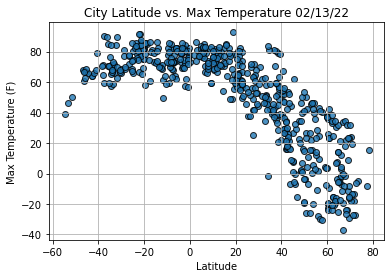

In [20]:
# create a scatter plot for the latitude vs. maximum temperature

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [21]:
# 6.3.2 Plot Lattitude vs. Humidity

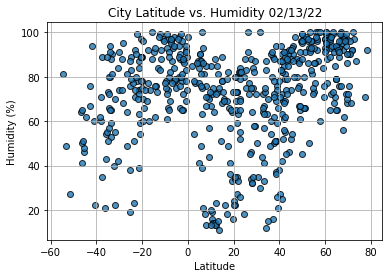

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [23]:
# 6.3.3 Plot Latitude vs. Cloudiness

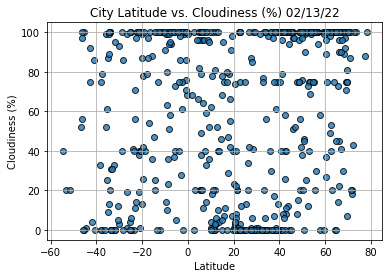

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [25]:
# 6.3.4 Plot Latitude vs. Wind Speed

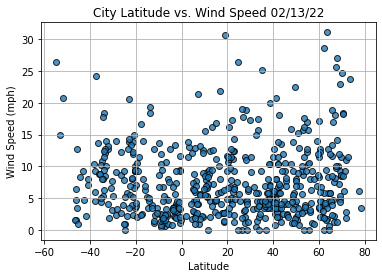

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [28]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                 Port Lincoln
Country                        AU
Date          2022-02-14 00:28:59
Lat                      -34.7333
Lng                      135.8667
Max Temp                    70.03
Humidity                       73
Cloudiness                     87
Wind Speed                  10.83
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
546     True
547     True
548    False
549     True
550     True
Name: Lat, Length: 551, dtype: bool

In [32]:
# return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2022-02-14 00:28:55,78.2186,15.6401,15.64,92,100,3.44
2,Port Blair,IN,2022-02-14 00:28:56,11.6667,92.7500,69.84,88,20,0.00
4,Bathsheba,BB,2022-02-14 00:28:56,13.2167,-59.5167,77.61,73,40,16.11
6,Mangan,IN,2022-02-14 00:28:56,27.5167,88.5333,48.74,46,1,7.23
8,Faya,SA,2022-02-14 00:28:57,18.3851,42.4509,48.72,57,66,1.19
...,...,...,...,...,...,...,...,...,...
544,Hirara,JP,2022-02-14 00:39:15,24.8000,125.2833,66.06,88,75,26.46
546,Finnsnes,NO,2022-02-14 00:43:35,69.2296,17.9811,23.34,99,71,4.32
547,Leningradskiy,RU,2022-02-14 00:43:35,69.3833,178.4167,-15.61,90,81,5.41
549,Linjiang,CN,2022-02-14 00:43:35,41.8069,126.9078,21.61,91,100,2.01


In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2022-02-14 00:28:55,78.2186,15.6401,15.64,92,100,3.44
2,Port Blair,IN,2022-02-14 00:28:56,11.6667,92.7500,69.84,88,20,0.00
4,Bathsheba,BB,2022-02-14 00:28:56,13.2167,-59.5167,77.61,73,40,16.11
6,Mangan,IN,2022-02-14 00:28:56,27.5167,88.5333,48.74,46,1,7.23
8,Faya,SA,2022-02-14 00:28:57,18.3851,42.4509,48.72,57,66,1.19


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

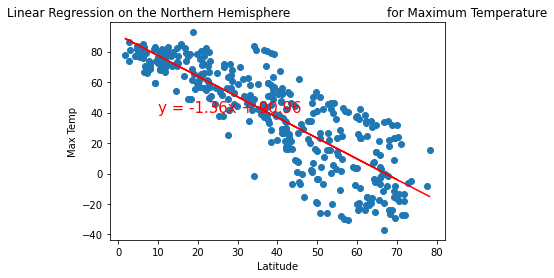

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

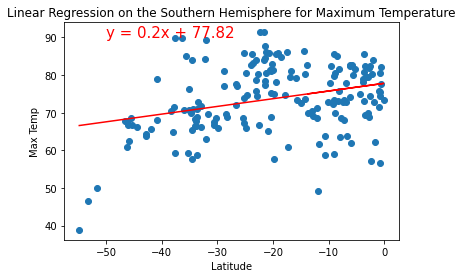

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
#  'Linear Regression on the Southern Hemisphere \n
#                        for Maximum Temperature'
# generated a literal error, when I returned the n befor the slash it works the the spacing still isn't like the example
# SyntaxError: EOL while scanning string literal
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [37]:
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

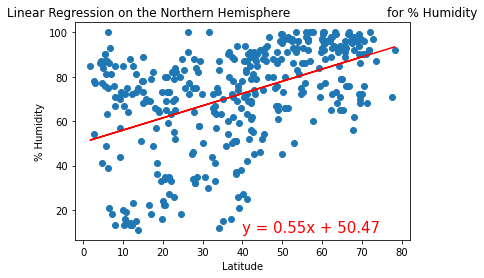

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

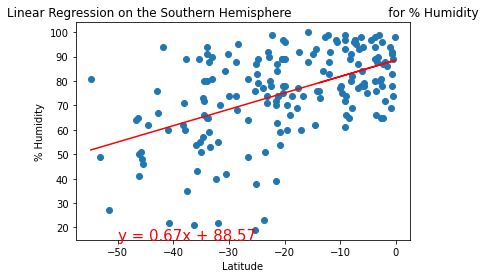

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [40]:
# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

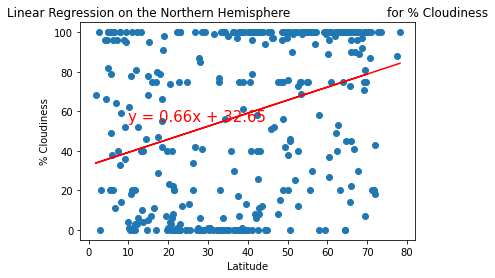

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

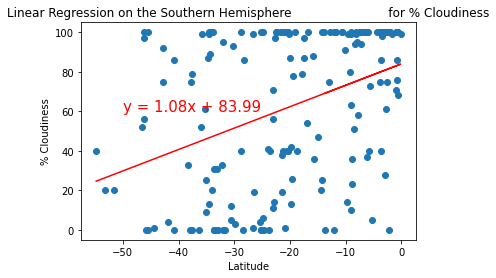

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [43]:
# 6.4.5 Find the Correlation Between Latitude and Wind Speed

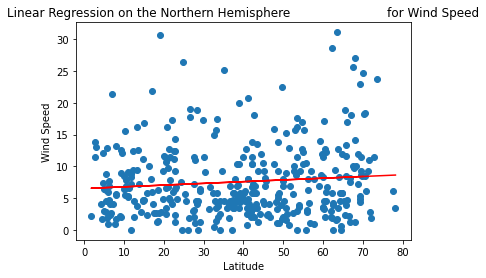

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

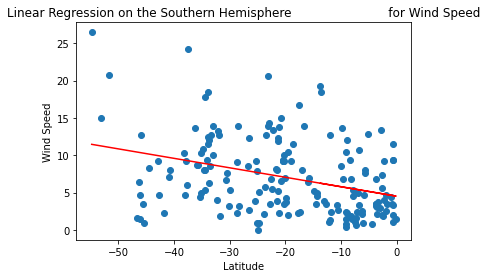

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))